In [1]:
import pandas as pd
import scanpy as sc
import os
import torch
import anndata
import numpy as np
from torchmetrics import R2Score
import seaborn as sns
directory = os.path.join(os.getcwd(), 'pred')
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300

/tmp/ipykernel_5395/2372147874.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
def compute_r2(y_true, y_pred):
    """
    Computes the r2 score for `y_true` and `y_pred`,
    returns `-1` when `y_pred` contains nan values
    """
    y_pred = torch.clamp(y_pred, -3e12, 3e12)
    metric = R2Score().to(y_true.device)
    metric.update(y_pred, y_true)  # same as sklearn.r2_score(y_true, y_pred)
    return metric.compute().item()

In [3]:
ood_conds=['CNN1+ETS2',
 'FOXF1',
 'EKLF',
 'UBASH3A',
 'CNN1',
 'FOXA1',
 'BAK1',
 'CEBPE',
 'SET',
 'RUNX1',
 'ETS2',
 'SLC4A1',
 'MEIS1',
 'MIDEAS',
 'OSR2',
 'CEBPE+RUNX1',
 'TBX2+TBX3',
 'CBARP',
 'UBASH3B',
 'DUSP9+ETS2',
 'MAP2K6',
 'OSR2+UBASH3B']

In [4]:
ccl='K562'

In [5]:
mean_score=[]
var_score=[]

for a in ood_conds:
    yp_m=pd.read_pickle(f'{directory}/means_pred_{ccl}_{a}.pkl').values.mean(0)   
    yp_v=pd.read_pickle(f'{directory}/var_pred_{ccl}_{a}.pkl').values.mean(0)
    y_true=pd.read_pickle(f'{directory}/ytrue_pred_{ccl}_{a}.pkl').values
    yt_m = y_true.mean(0)
    yt_v = y_true.var(0)
    
    
    r2_m = compute_r2(torch.tensor(yt_m), torch.tensor(yp_m))
    r2_v = compute_r2(torch.tensor(yt_v), torch.tensor(yp_v))
    
    mean_score.append(max(r2_m, 0.0))
    var_score.append(max(r2_v, 0.0))

<Axes: ylabel='Count'>

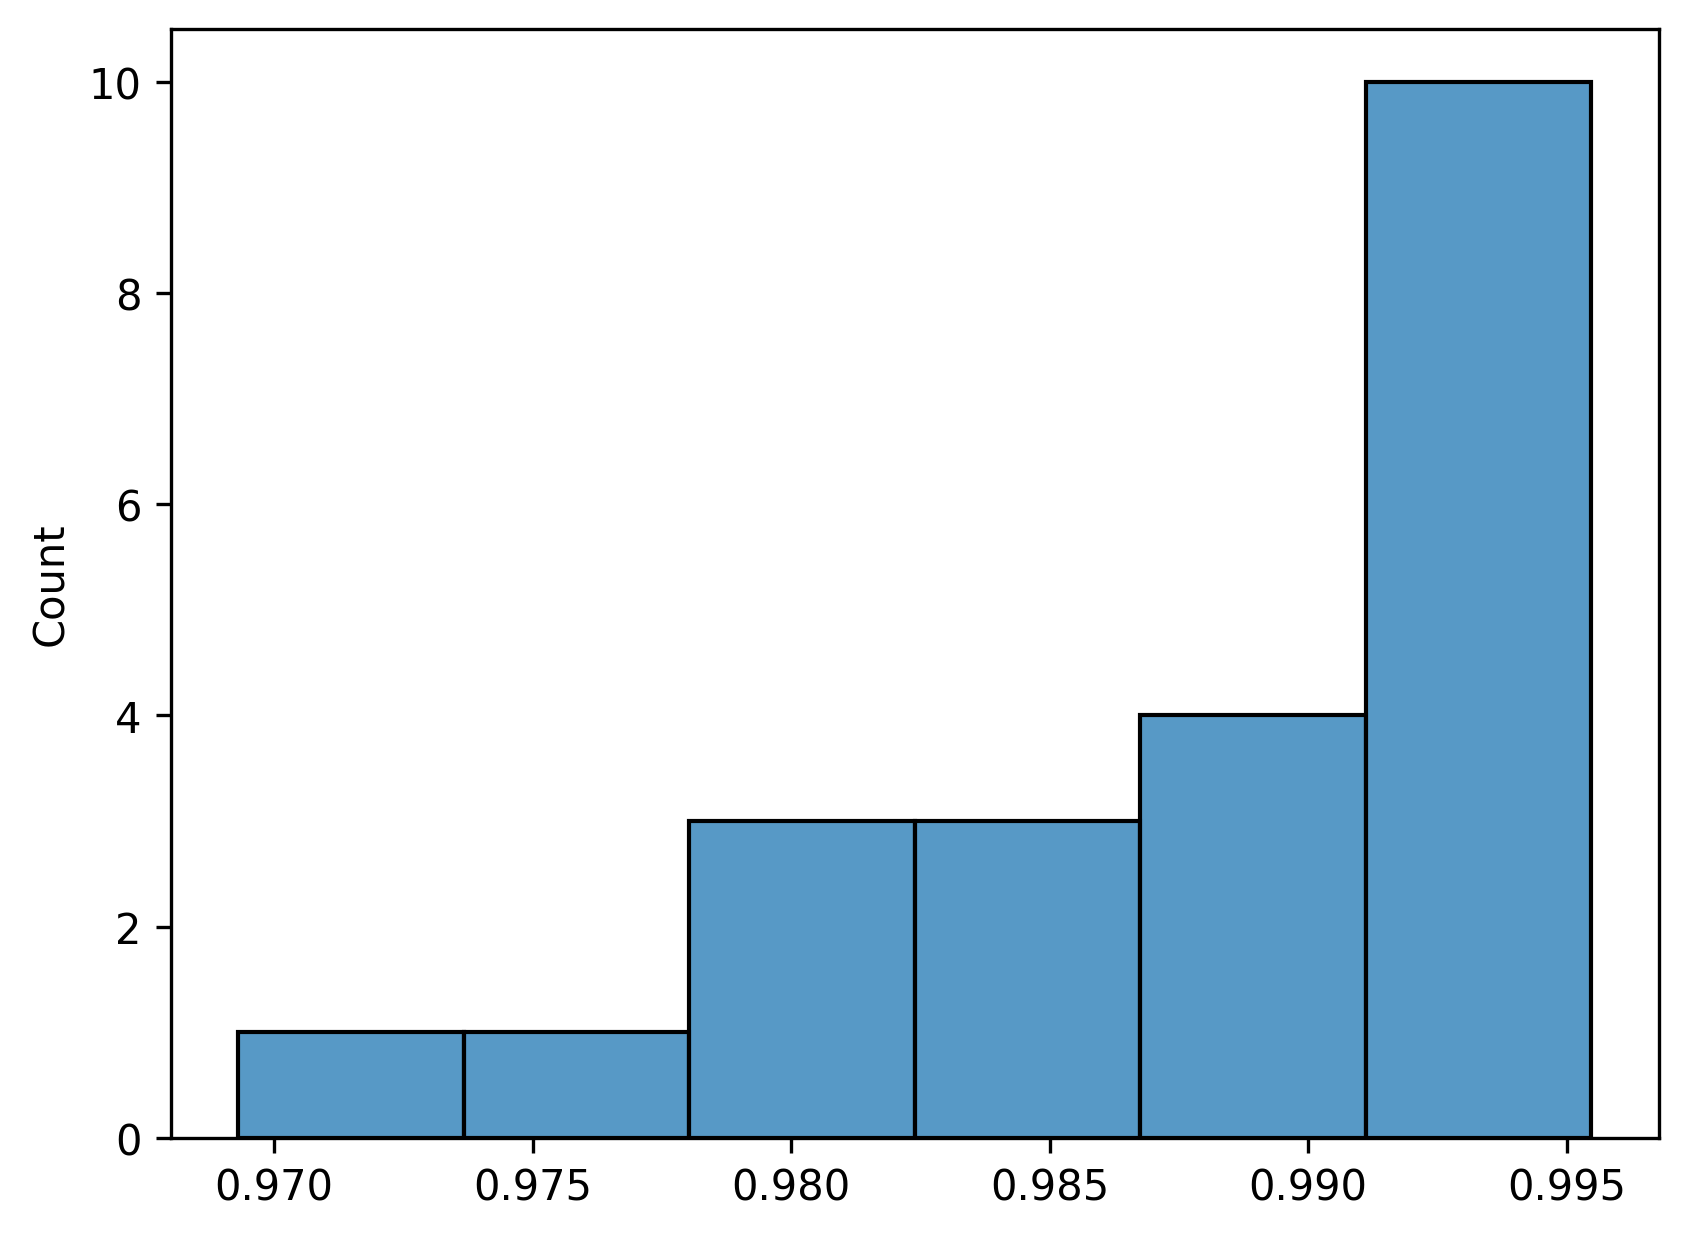

In [6]:
sns.histplot(mean_score)

<Axes: ylabel='Count'>

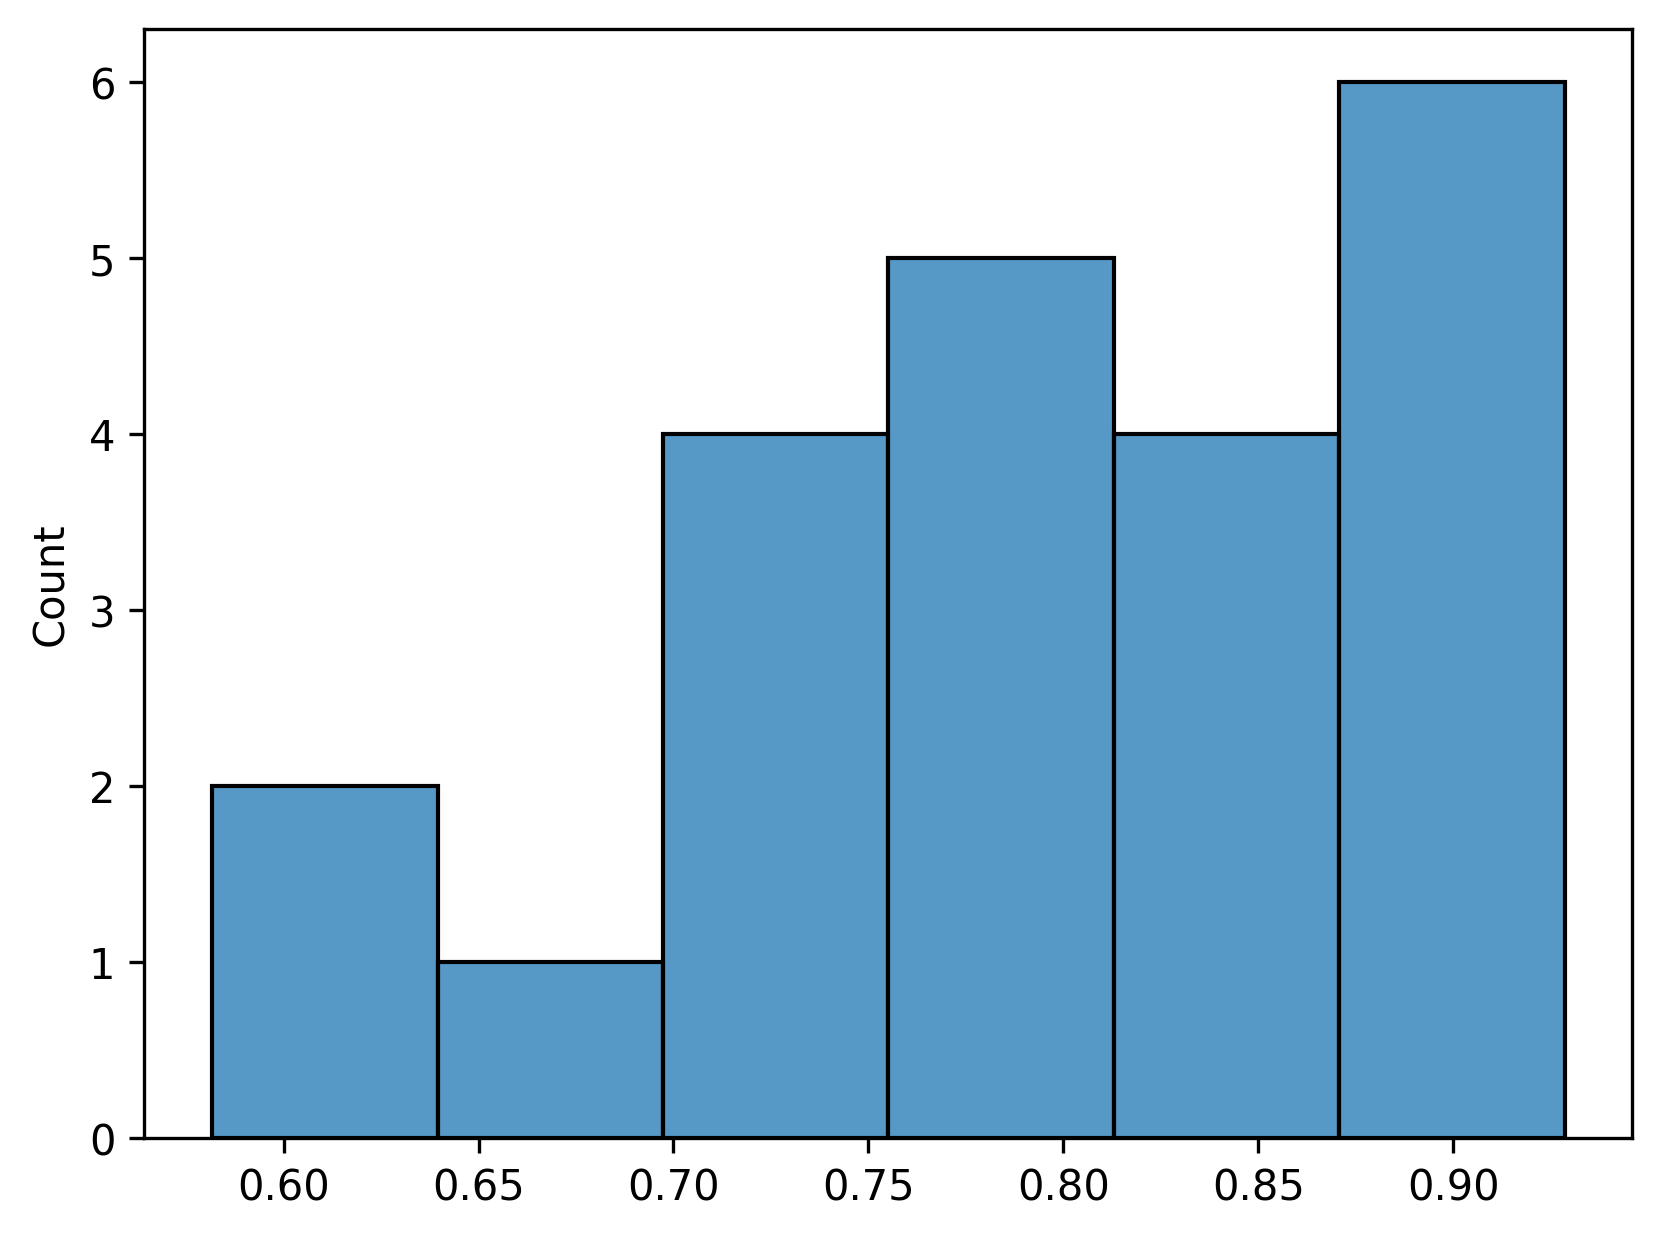

In [7]:
sns.histplot(var_score)

In [8]:
pd.DataFrame({'c':ood_conds, 'sc':mean_score}).sort_values('sc')

c        sc
16     TBX2+TBX3  0.969309
8            SET  0.974462
11        SLC4A1  0.979392
7          CEBPE  0.980195
2           EKLF  0.982198
19    DUSP9+ETS2  0.982749
14          OSR2  0.983127
10          ETS2  0.983991
15   CEBPE+RUNX1  0.986936
21  OSR2+UBASH3B  0.989851
4           CNN1  0.989986
9          RUNX1  0.990210
13        MIDEAS  0.991309
0      CNN1+ETS2  0.991817
20        MAP2K6  0.991910
17         CBARP  0.993551
6           BAK1  0.993561
5          FOXA1  0.994199
1          FOXF1  0.994287
18       UBASH3B  0.995198
12         MEIS1  0.995207
3        UBASH3A  0.995476

In [9]:
Path='/home/manu/chemCPA/chemCPA/anndatas'
a0=sc.read_h5ad(f'{Path}/adata_empty2.h5ad')

/home/manu/bl/lib/python3.9/site-packages/anndata/_core/anndata.py:1906: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [10]:
mean_score=[]
var_score=[]

for a in ood_conds:
    yp_m=np.array(a0[a0.obs['treatment']=='control'].X).mean(0)   
    yp_v=np.array(a0[a0.obs['treatment']=='control'].X).var(0)  
    y_true=pd.read_pickle(f'{directory}/ytrue_pred_{ccl}_{a}.pkl').values
    yt_m = y_true.mean(0)
    yt_v = y_true.var(0)
    
    
    r2_m = compute_r2(torch.tensor(yt_m), torch.tensor(yp_m))
    r2_v = compute_r2(torch.tensor(yt_v), torch.tensor(yp_v))
    
    mean_score.append(max(r2_m, 0.0))
    var_score.append(max(r2_v, 0.0))

In [11]:
sorted(mean_score)

[0.9503113031387329,
 0.9672407507896423,
 0.9742071628570557,
 0.9770530462265015,
 0.980466902256012,
 0.9804791212081909,
 0.9818446636199951,
 0.9819492697715759,
 0.9850430488586426,
 0.9859788417816162,
 0.9901013374328613,
 0.9932001233100891,
 0.9942052960395813,
 0.9949133396148682,
 0.9957237839698792,
 0.9960805177688599,
 0.9969606995582581,
 0.997188925743103,
 0.9974056482315063,
 0.9982796907424927,
 0.9984501004219055,
 0.9993043541908264]

<Axes: ylabel='Count'>

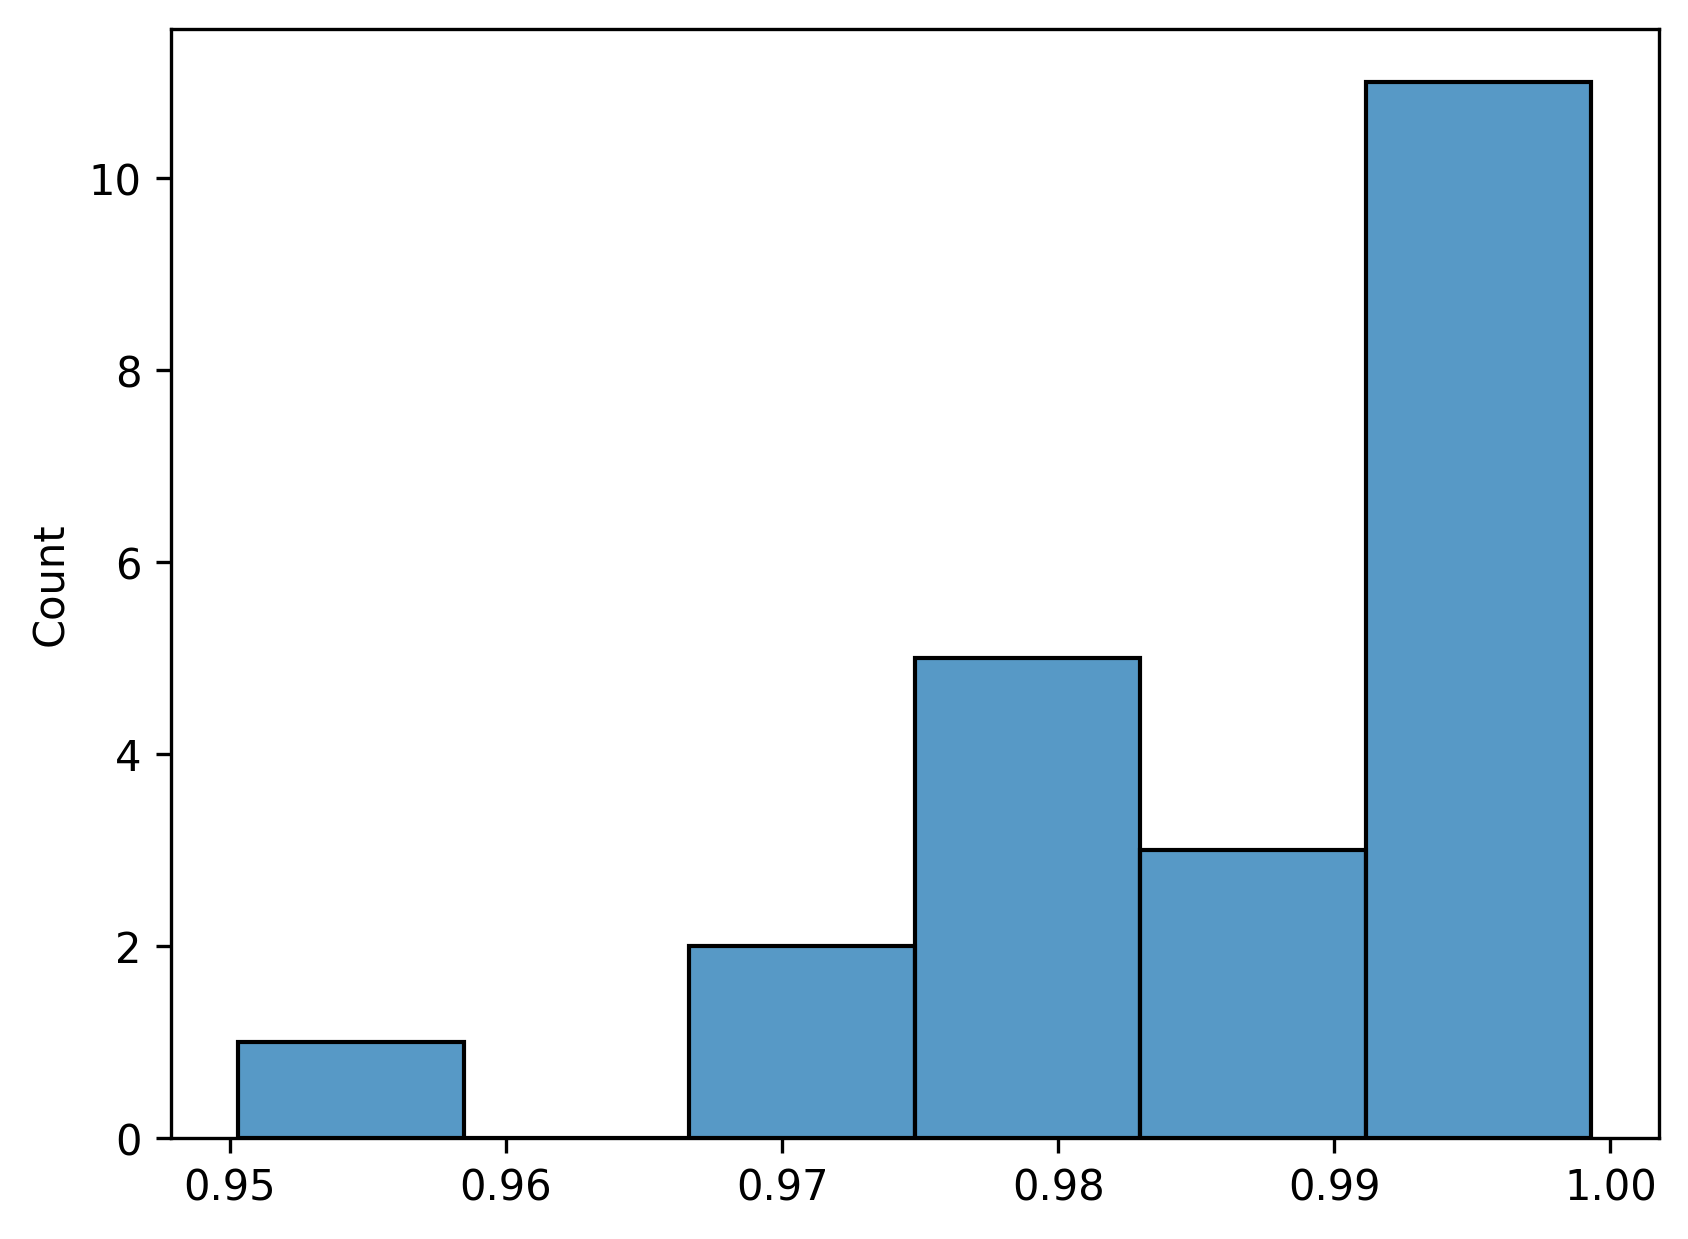

In [12]:
sns.histplot(mean_score)

<Axes: ylabel='Count'>

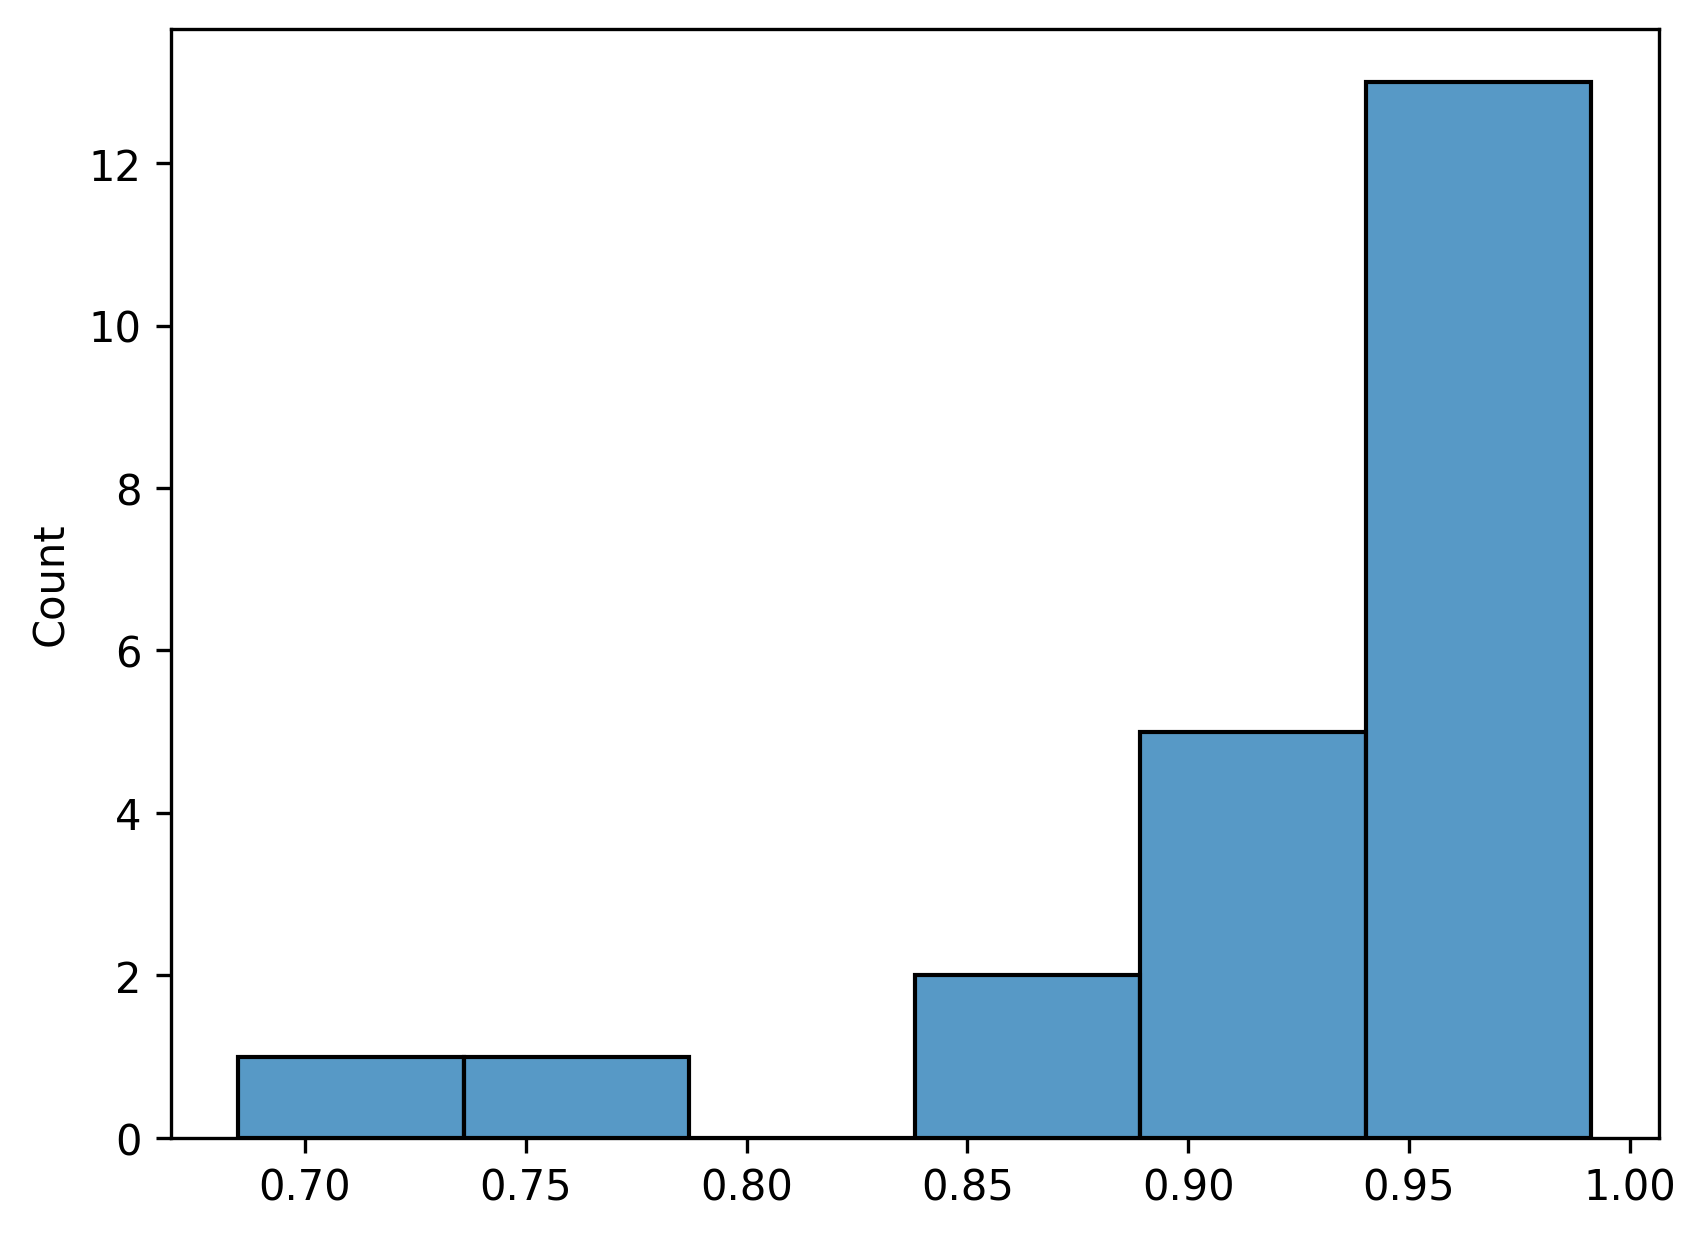

In [13]:
sns.histplot(var_score)

In [14]:
sorted(var_score)

[0.684951663017273,
 0.7710534930229187,
 0.842816174030304,
 0.8477364182472229,
 0.8950674533843994,
 0.8962945342063904,
 0.8983230590820312,
 0.9278057217597961,
 0.9340073466300964,
 0.9509450197219849,
 0.9529498815536499,
 0.9641568660736084,
 0.9671212434768677,
 0.9746378064155579,
 0.976470947265625,
 0.9787301421165466,
 0.9800188541412354,
 0.9841932654380798,
 0.986359715461731,
 0.9881690144538879,
 0.9911699295043945,
 0.9912662506103516]

In [15]:
a='CEBPE'
# perturbation data - predicted
yp_m=pd.read_pickle(f'{directory}/means_pred_{ccl}_{a}.pkl').values 
yp_v=pd.read_pickle(f'{directory}/var_pred_{ccl}_{a}.pkl').values
X=yp_m+np.random.normal(0,1,yp_m.shape)*yp_v
a2=anndata.AnnData(X)
a2.obs['set']='pertubed_predicted'
a2.obs['treatment']=a

In [16]:
adata=anndata.concat([a0,a2])
adata.obs['reduced_treatments']=[a if a in ['control', 'CEBPE'] else 'not' for a in adata.obs['treatment']]
adata

/home/manu/bl/lib/python3.9/site-packages/anndata/_core/anndata.py:1906: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 99694 × 2000
    obs: 'set', 'treatment', 'reduced_treatments'

### And some UMAPS

In [17]:
sc.pp.pca(adata)

/home/manu/bl/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/manu/bl/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


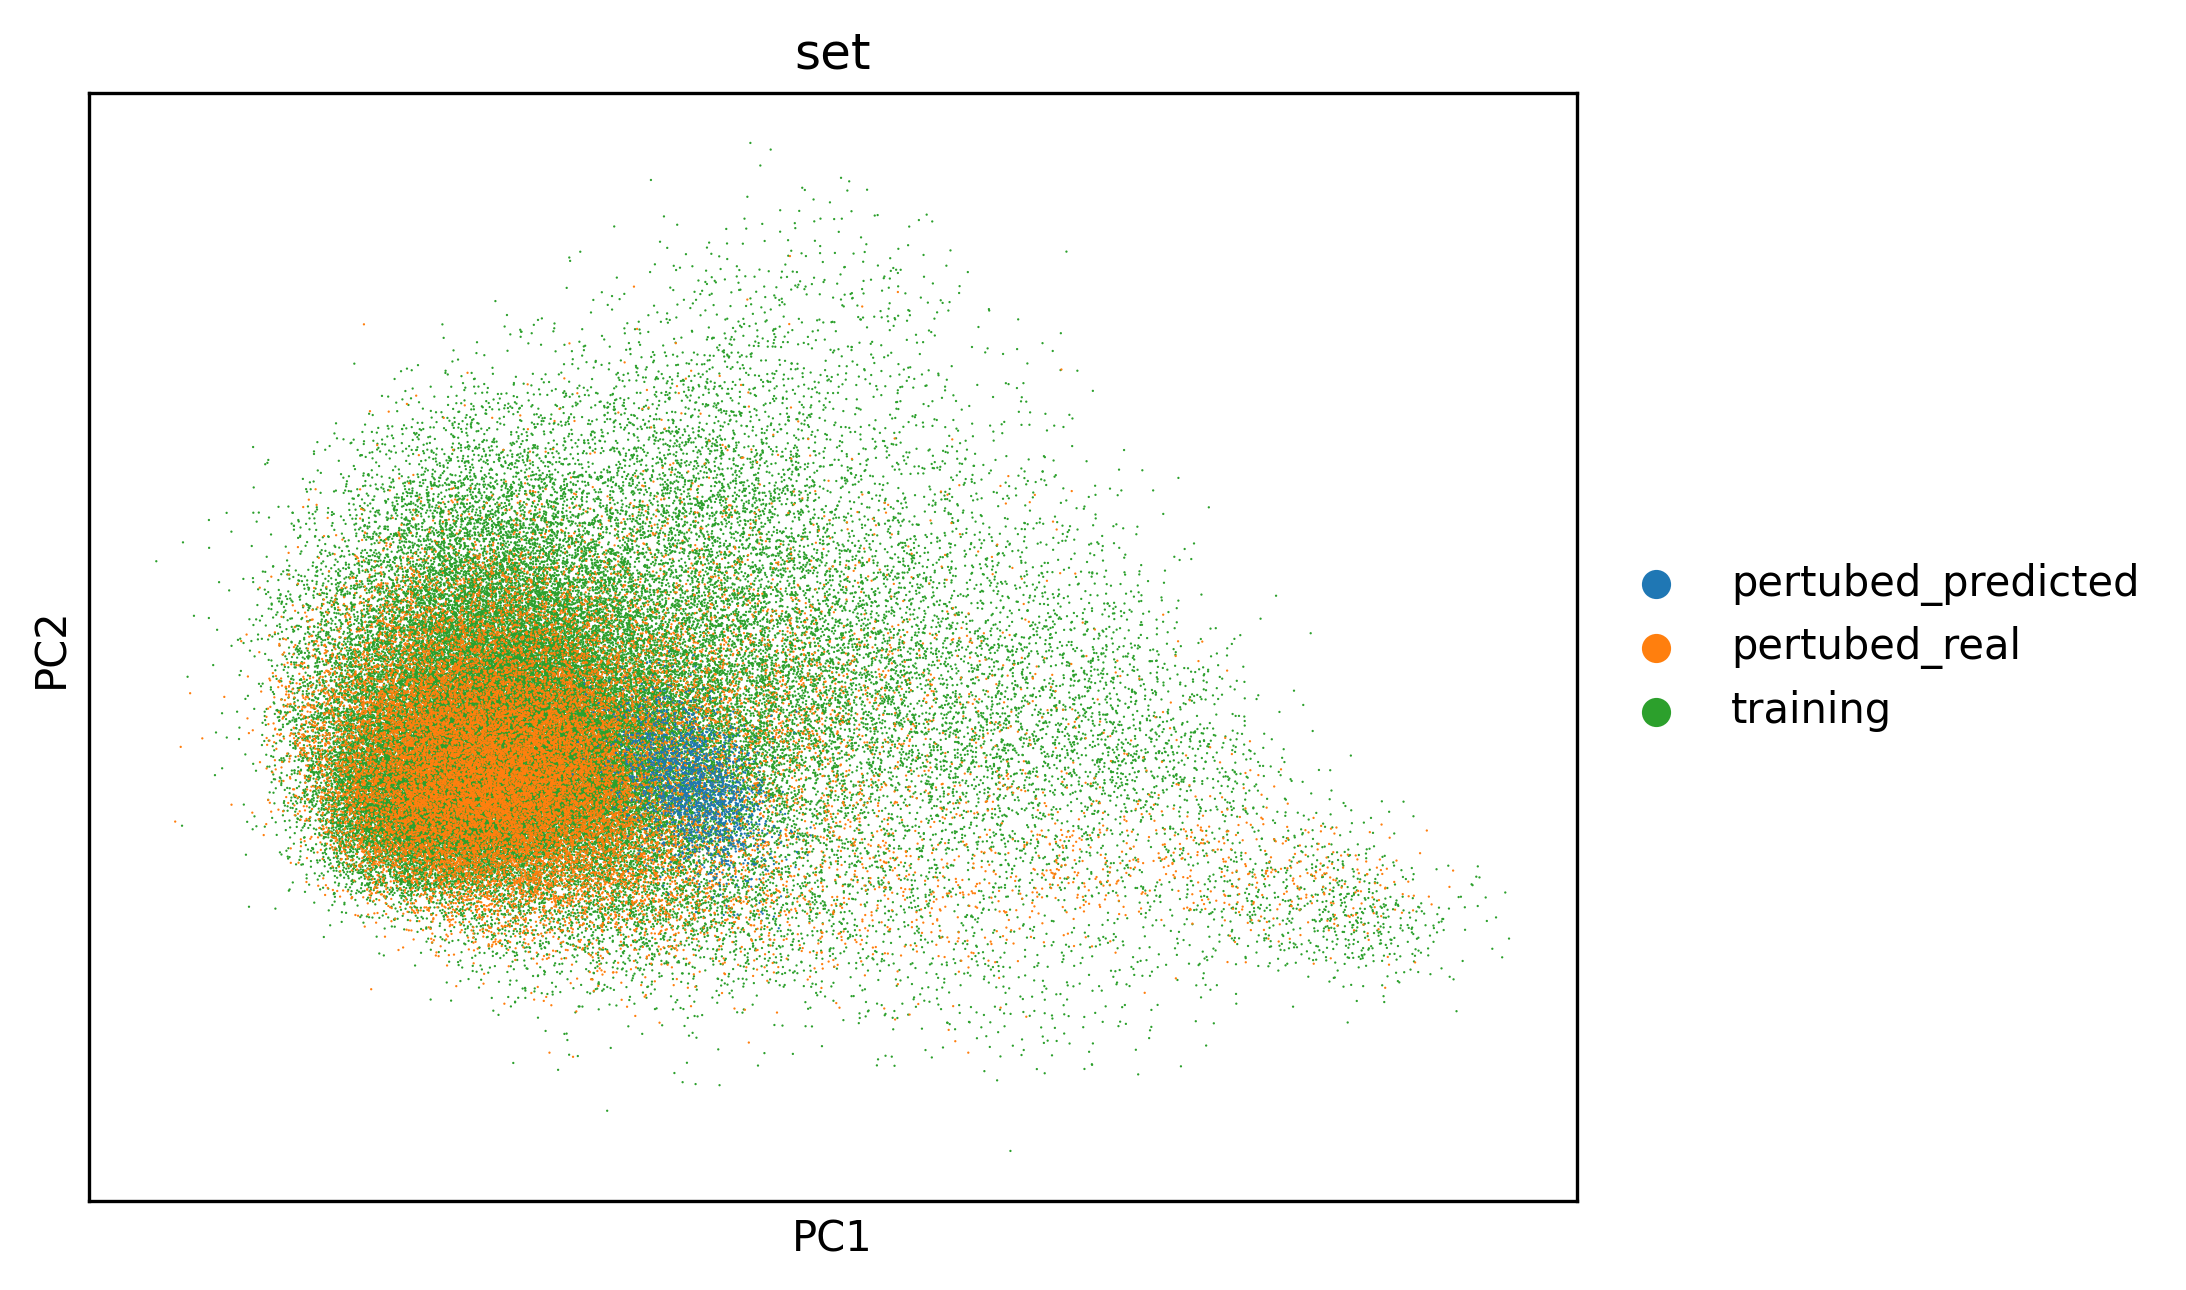

In [18]:
sc.pl.pca(adata, color='set')

/home/manu/bl/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/manu/bl/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


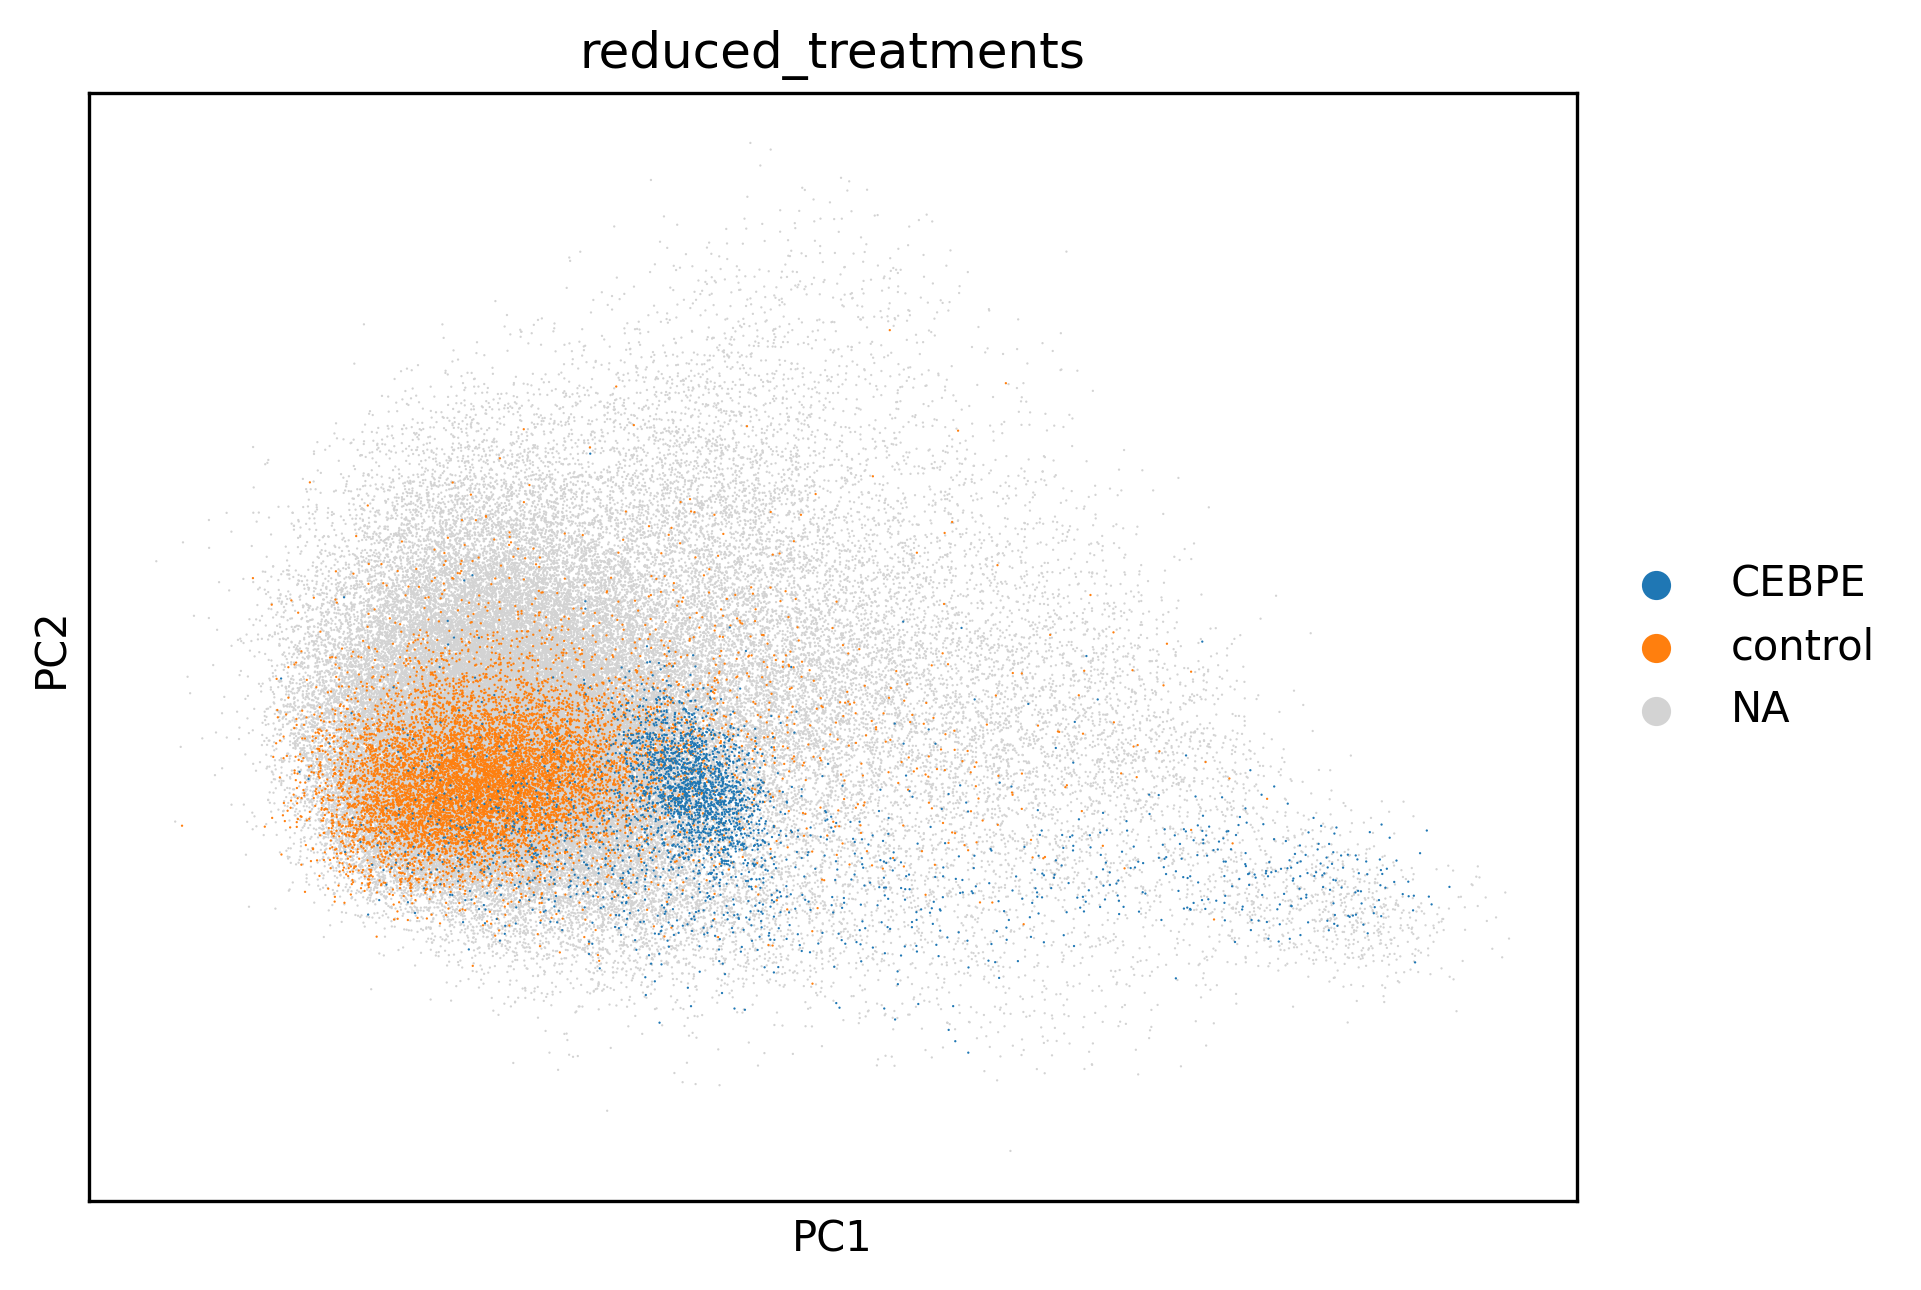

In [19]:
sc.pl.pca(adata, color='reduced_treatments', groups=['control', 'CEBPE'])

In [20]:
sc.pp.neighbors(adata)

/home/manu/bl/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [21]:
sc.tl.umap(adata, random_state=1)

/home/manu/bl/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/manu/bl/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


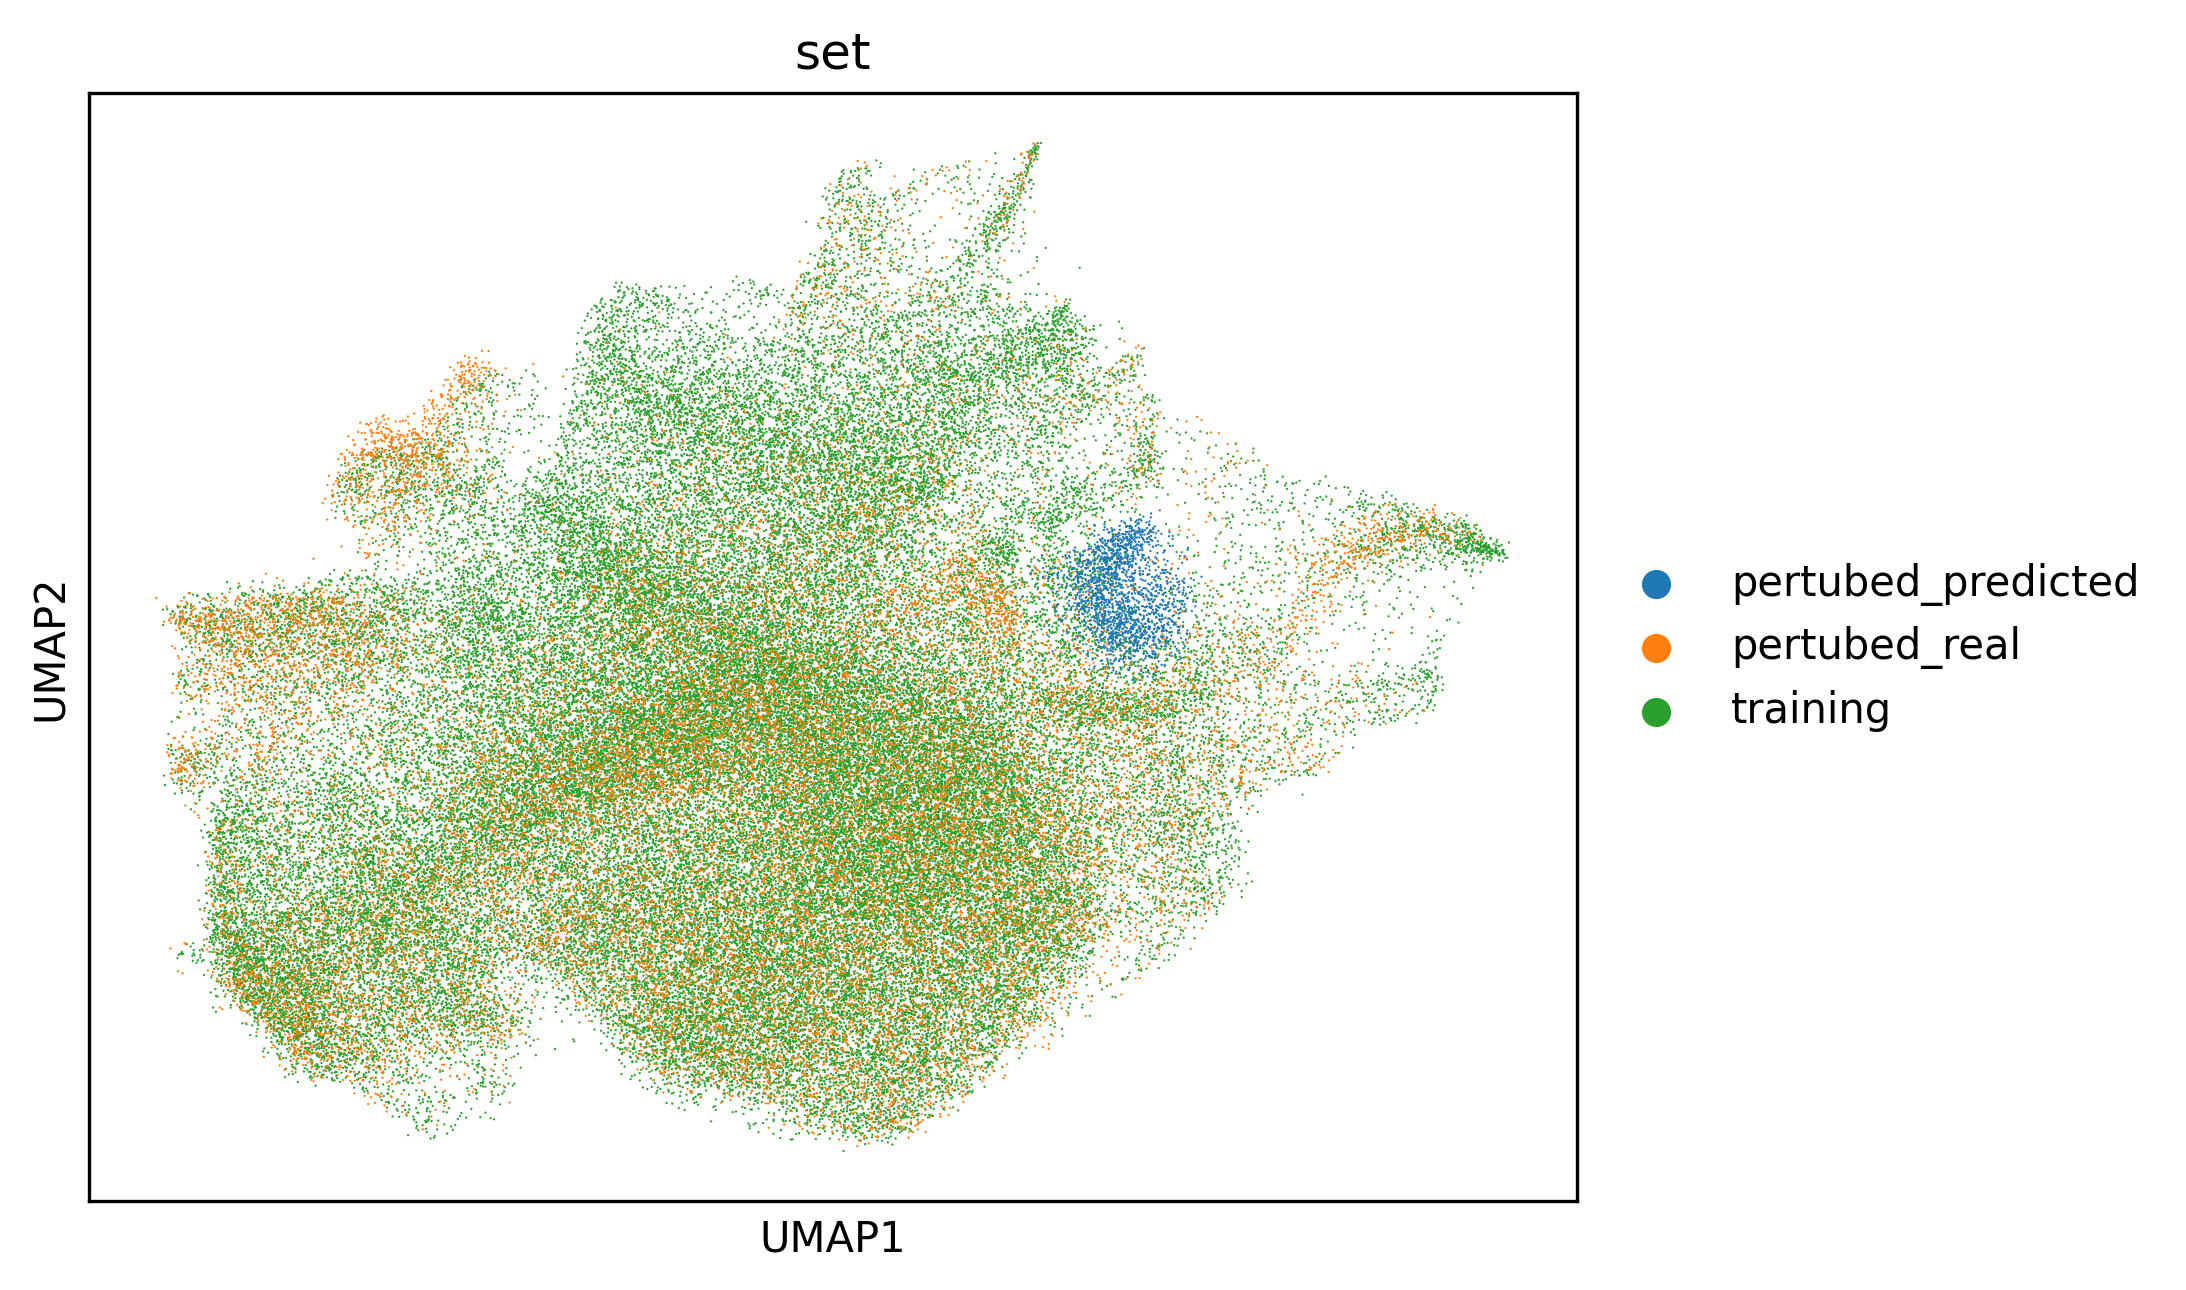

In [22]:
sc.pl.umap(adata, color='set')

In [23]:
adata.obs['set_and_treatment']=adata.obs['set'].astype('str')+'_'+adata.obs['reduced_treatments'].astype('str')
adata.obs['set_and_treatment'].value_counts()

set_and_treatment
training_not                65431
pertubed_real_not           21198
training_control            10072
pertubed_predicted_CEBPE     1763
pertubed_real_CEBPE          1230
Name: count, dtype: int64

/home/manu/bl/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/manu/bl/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


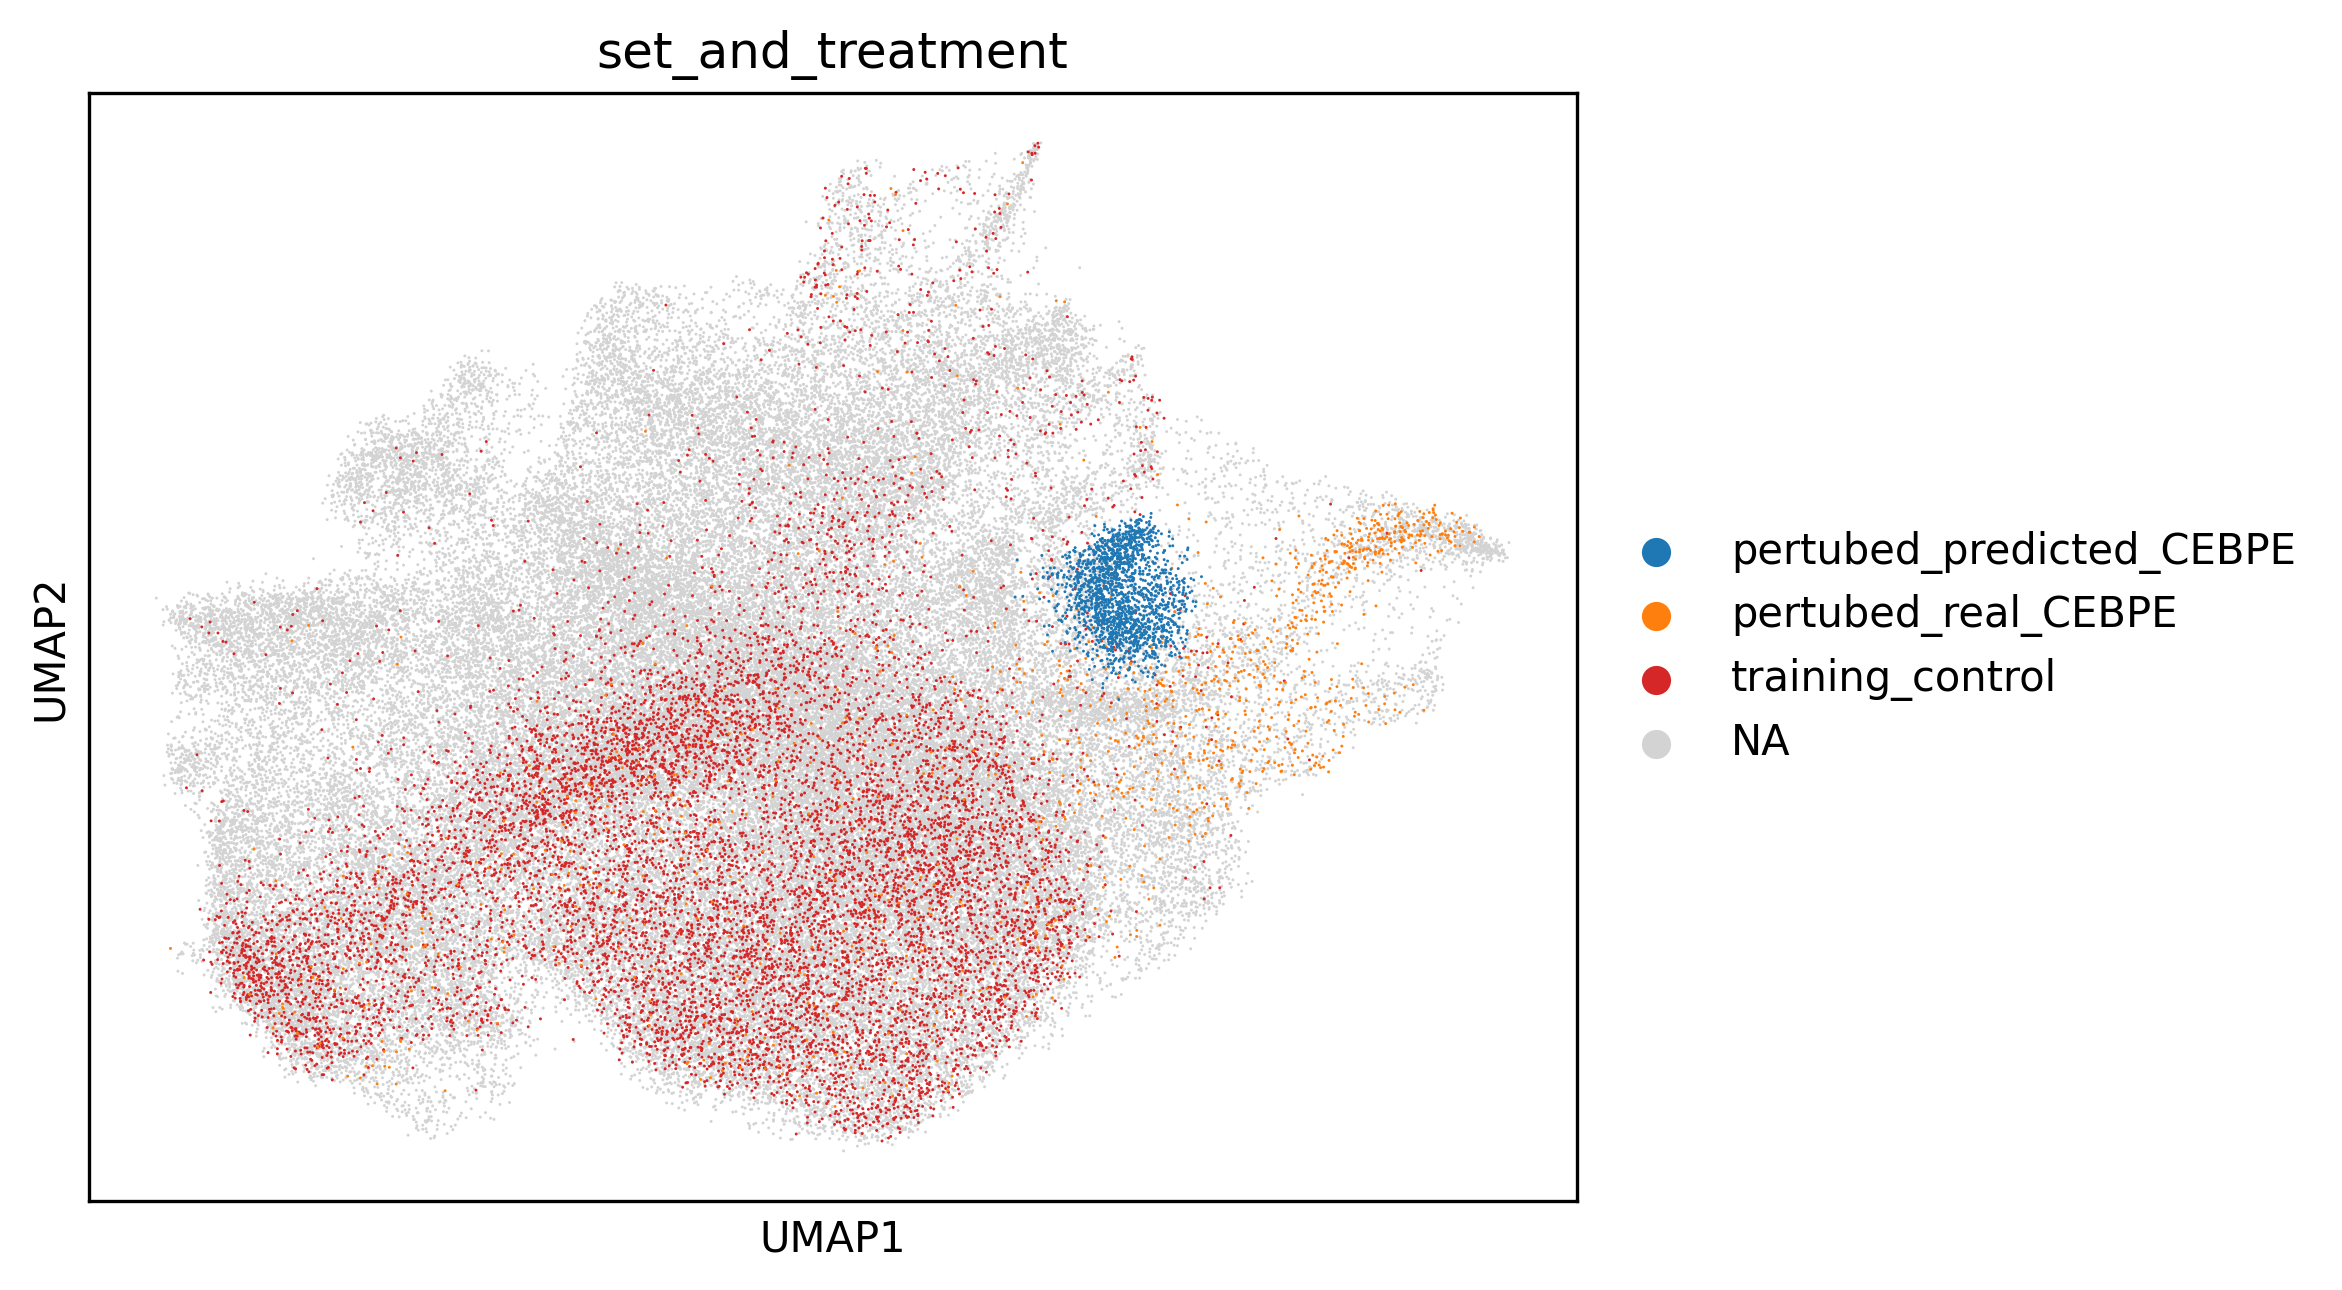

In [25]:
sc.pl.umap(adata, color='set_and_treatment', groups=['training_control', 'pertubed_predicted_CEBPE', 'pertubed_real_CEBPE'], s=2)